# Data Augmentation


You know that the potential of deep learning models is limited by the amount of data available to train our model. Generally, we need a huge amount of data: the most performant vision models are trained on billions of images, and NLP models (LLMs) on trillions of tokens.

Often, obtaining high-quality labeled data is a complex and costly task.

Is it possible to artificially increase our data through clever transformations?

Yes! It is possible, and this is called *data augmentation*. In this section, we will look at different *data augmentation* methods for images and briefly present the possibilities of *data augmentation* for NLP and audio.


## Data augmentation for images


The *data augmentation* techniques presented in this section have shown benefits for training deep learning models. However, we must be cautious because sometimes certain types of *data augmentation* do not align with our training objective (for example, if we want to detect lying people, we should avoid rotating the image by 90 degrees).

To introduce the different *data augmentation* methods, we use PyTorch and specifically torchvision, which offers a wide range of *data augmentation* techniques.


Let's start with our base image:


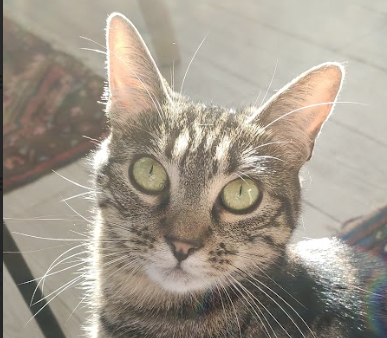

In [1]:
from PIL import Image
image_pil=Image.open("images/tigrou.png")
image_pil

Let's transform our image into a PyTorch tensor.


In [2]:
import torchvision.transforms as T 
transform=T.Compose([T.ToTensor(),T.Resize((360,360))])
image=transform(image_pil)[0:3,:,:]

/home/aquilae/anaconda3/envs/dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Horizontal/vertical inversion and rotation


A first idea for *data augmentation* is to apply transformations such as flipping the image (horizontally or vertically) or rotating the image. Indeed, an upside-down cat is still a cat.

**To consider**: If we wanted to differentiate between the "cat" class and the "upside-down cat" class, we could not use this technique. We must always be sure of what we need.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


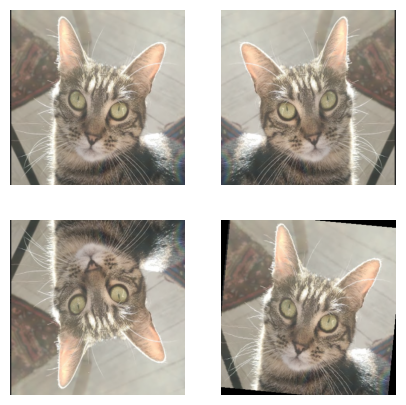

In [3]:
import matplotlib.pyplot as plt

horiz_flip=T.Compose([T.RandomHorizontalFlip(p=1)])
image_horiz_flip=horiz_flip(image)
vert_flip=T.Compose([T.RandomVerticalFlip(p=1)])
image_vert_flip=vert_flip(image)
rot=T.Compose([T.RandomRotation(degrees=90)])
image_rot=rot(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_horiz_flip.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_vert_flip.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_rot.permute(1,2,0))
plt.axis("off")
plt.show()

### Image cropping


Another technique is to crop a part of the image and use this crop as the input image. There is the possibility of *CenterCrop* (a crop in the center) or *RandomCrop* (random crop in the image).

**To consider**: With this method, we must ensure that the object is well present in our crop. If we choose a crop value that is too small or if the object does not occupy a significant place in the image, this type of *data augmentation* can be harmful (see last image).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


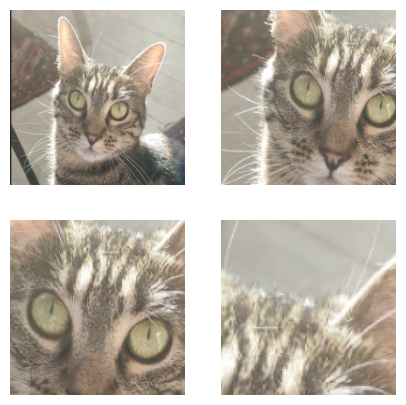

In [4]:
crop=T.Compose([T.RandomCrop(200)])
image_crop=crop(image)
center_crop=T.Compose([T.CenterCrop(150)])
image_center_crop=center_crop(image)

crop_small=T.Compose([T.RandomCrop(100)])
image_crop_small=crop_small(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_crop.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_center_crop.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_crop_small.permute(1,2,0))
plt.axis("off")
plt.show()

### Contrast, brightness, saturation, and hue


We can also choose to modify the values of brightness (*brightness*), contrast (*contrast*), saturation (*saturation*), and hue (*hue*) using the [ColorJitter](https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html) transformation.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


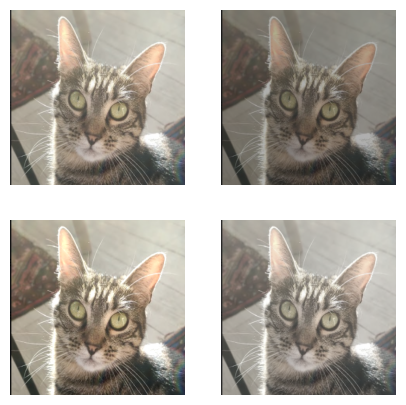

In [87]:
bright=T.Compose([T.ColorJitter(brightness=0.8)])
image_bright=bright(image)
contr=T.Compose([T.ColorJitter(contrast=0.8)])
image_contr=contr(image)

satur=T.Compose([T.ColorJitter(saturation=0.8)])
image_satur=satur(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_bright.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_contr.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_satur.permute(1,2,0))
plt.axis("off")
plt.show()

### Other transformations


Many other transformations are possible. We can remove a part of the image. We can also add padding around the image or solarize the image. It is also possible to define a precise affine transformation of what we will apply as a transformation to the image.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


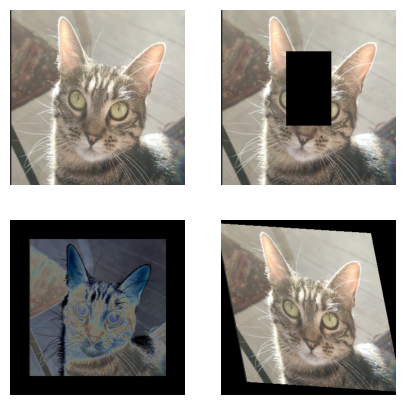

In [85]:
erase=T.Compose([T.RandomErasing(p=1)])
image_erase=erase(image)
solar=T.Compose([T.Pad(50),T.RandomSolarize(0.5,p=1)])
image_solar=solar(image)

affin=T.Compose([T.RandomAffine(degrees=30,scale=(0.8,1.2),shear=30)])
image_affin=affin(image)

plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image.permute(1,2,0))
plt.axis("off")
plt.subplot(222)
plt.imshow(image_erase.permute(1,2,0))
plt.axis("off")
plt.subplot(223)
plt.imshow(image_solar.permute(1,2,0))
plt.axis("off")
plt.subplot(224)
plt.imshow(image_affin.permute(1,2,0))
plt.axis("off")
plt.show()

*Data augmentation* is a very interesting technique that allows artificially increasing the training data. This enables training larger models without overfitting. In practice, it is often very interesting to include it in the training of your neural network, but you must still be careful not to do just anything.

I invite you to test your *data augmentation* on a few elements of your dataset to see if anything bothers you.

**Note**: There are other *data augmentation* methods, notably adding noise to the image. You can find the list of possible transformations in the [PyTorch documentation](https://pytorch.org/vision/stable/transforms.html).


## Data augmentation for text


We can also perform *data augmentation* in NLP. Here is a list of what is possible:
- We can randomly change the position of certain words in a sentence (makes the model robust but potentially dangerous to do)
- We can replace certain words with one of their synonyms
- We can paraphrase
- We can add or remove words randomly in the sentence

These techniques are not suitable for all NLP problems, and we must be very careful when using them.

**Note**: With the advent of LLMs, it is often possible to fine-tune our model effectively, even with very little data, which reduces the need for *data augmentation* in NLP.


## Data augmentation for audio


In the field of audio, it is sometimes also useful to use *data augmentation*. Here is a list of some techniques to artificially increase your audio data:
- Adding noise to the audio (Gaussian or random) to improve the model's performance in complex situations
- Shifting the recording
- Changing the speed of the recording
- Changing the pitch of the sound (higher or lower)
